In [31]:
pip install pdf2image opencv-python

In [32]:
pip install easyocr

In [33]:
pip install svgwrite

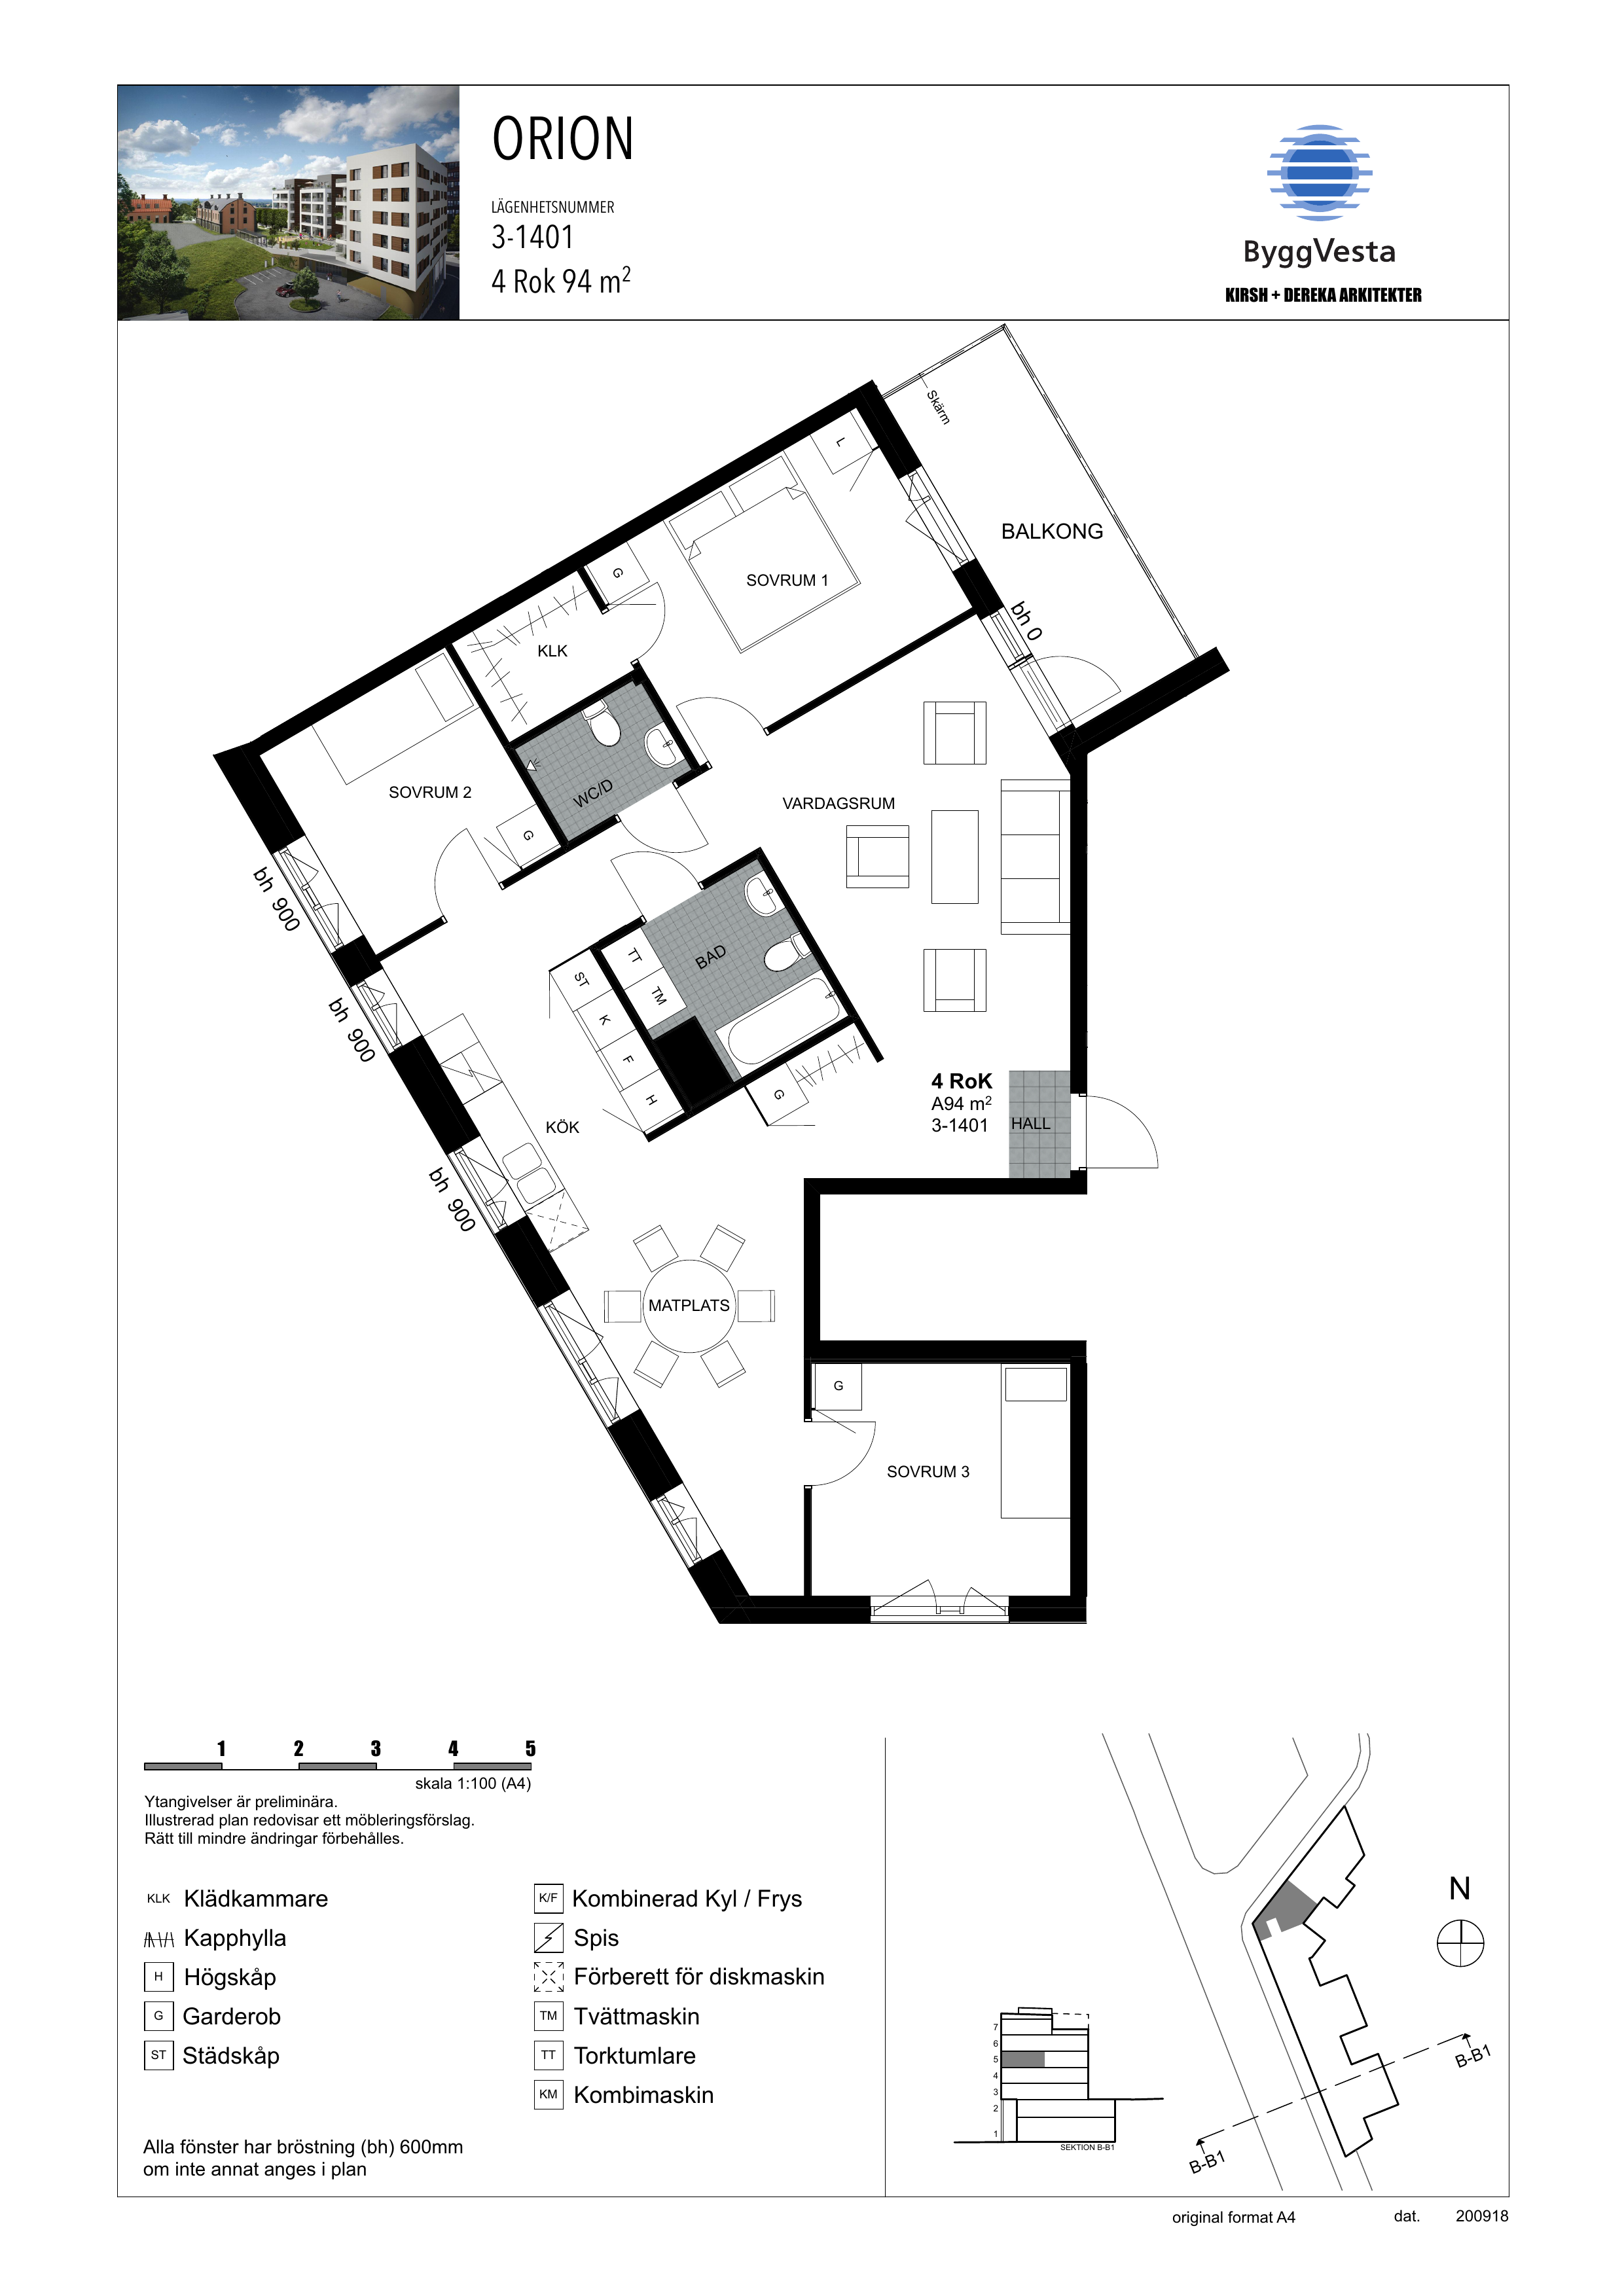

In [ ]:
from pdf2image import convert_from_path
import cv2
import numpy as np
# Import the necessary function for displaying images in Colab
from google.colab.patches import cv2_imshow

# Step 1: Convert PDF to Image (First Page)
sample_file = "/content/1636347planritning.pdf"
images = convert_from_path(sample_file, dpi=300)  # Increase DPI for better clarity

# Step 2: Convert PIL Image to OpenCV Format
cv_image = np.array(images[0])  # Convert the first page to numpy array
cv_image = cv2.cvtColor(cv_image, cv2.COLOR_RGB2BGR)  # Convert RGB to BGR for OpenCV

# Step 3: Display Image using OpenCV
# Use cv2_imshow instead of cv2.imshow to display the image in Colab
cv2_imshow(cv_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [50]:
image_path = '/content/1633441planritning.jpg'

cv_image_2 = cv2.imread(image_path)

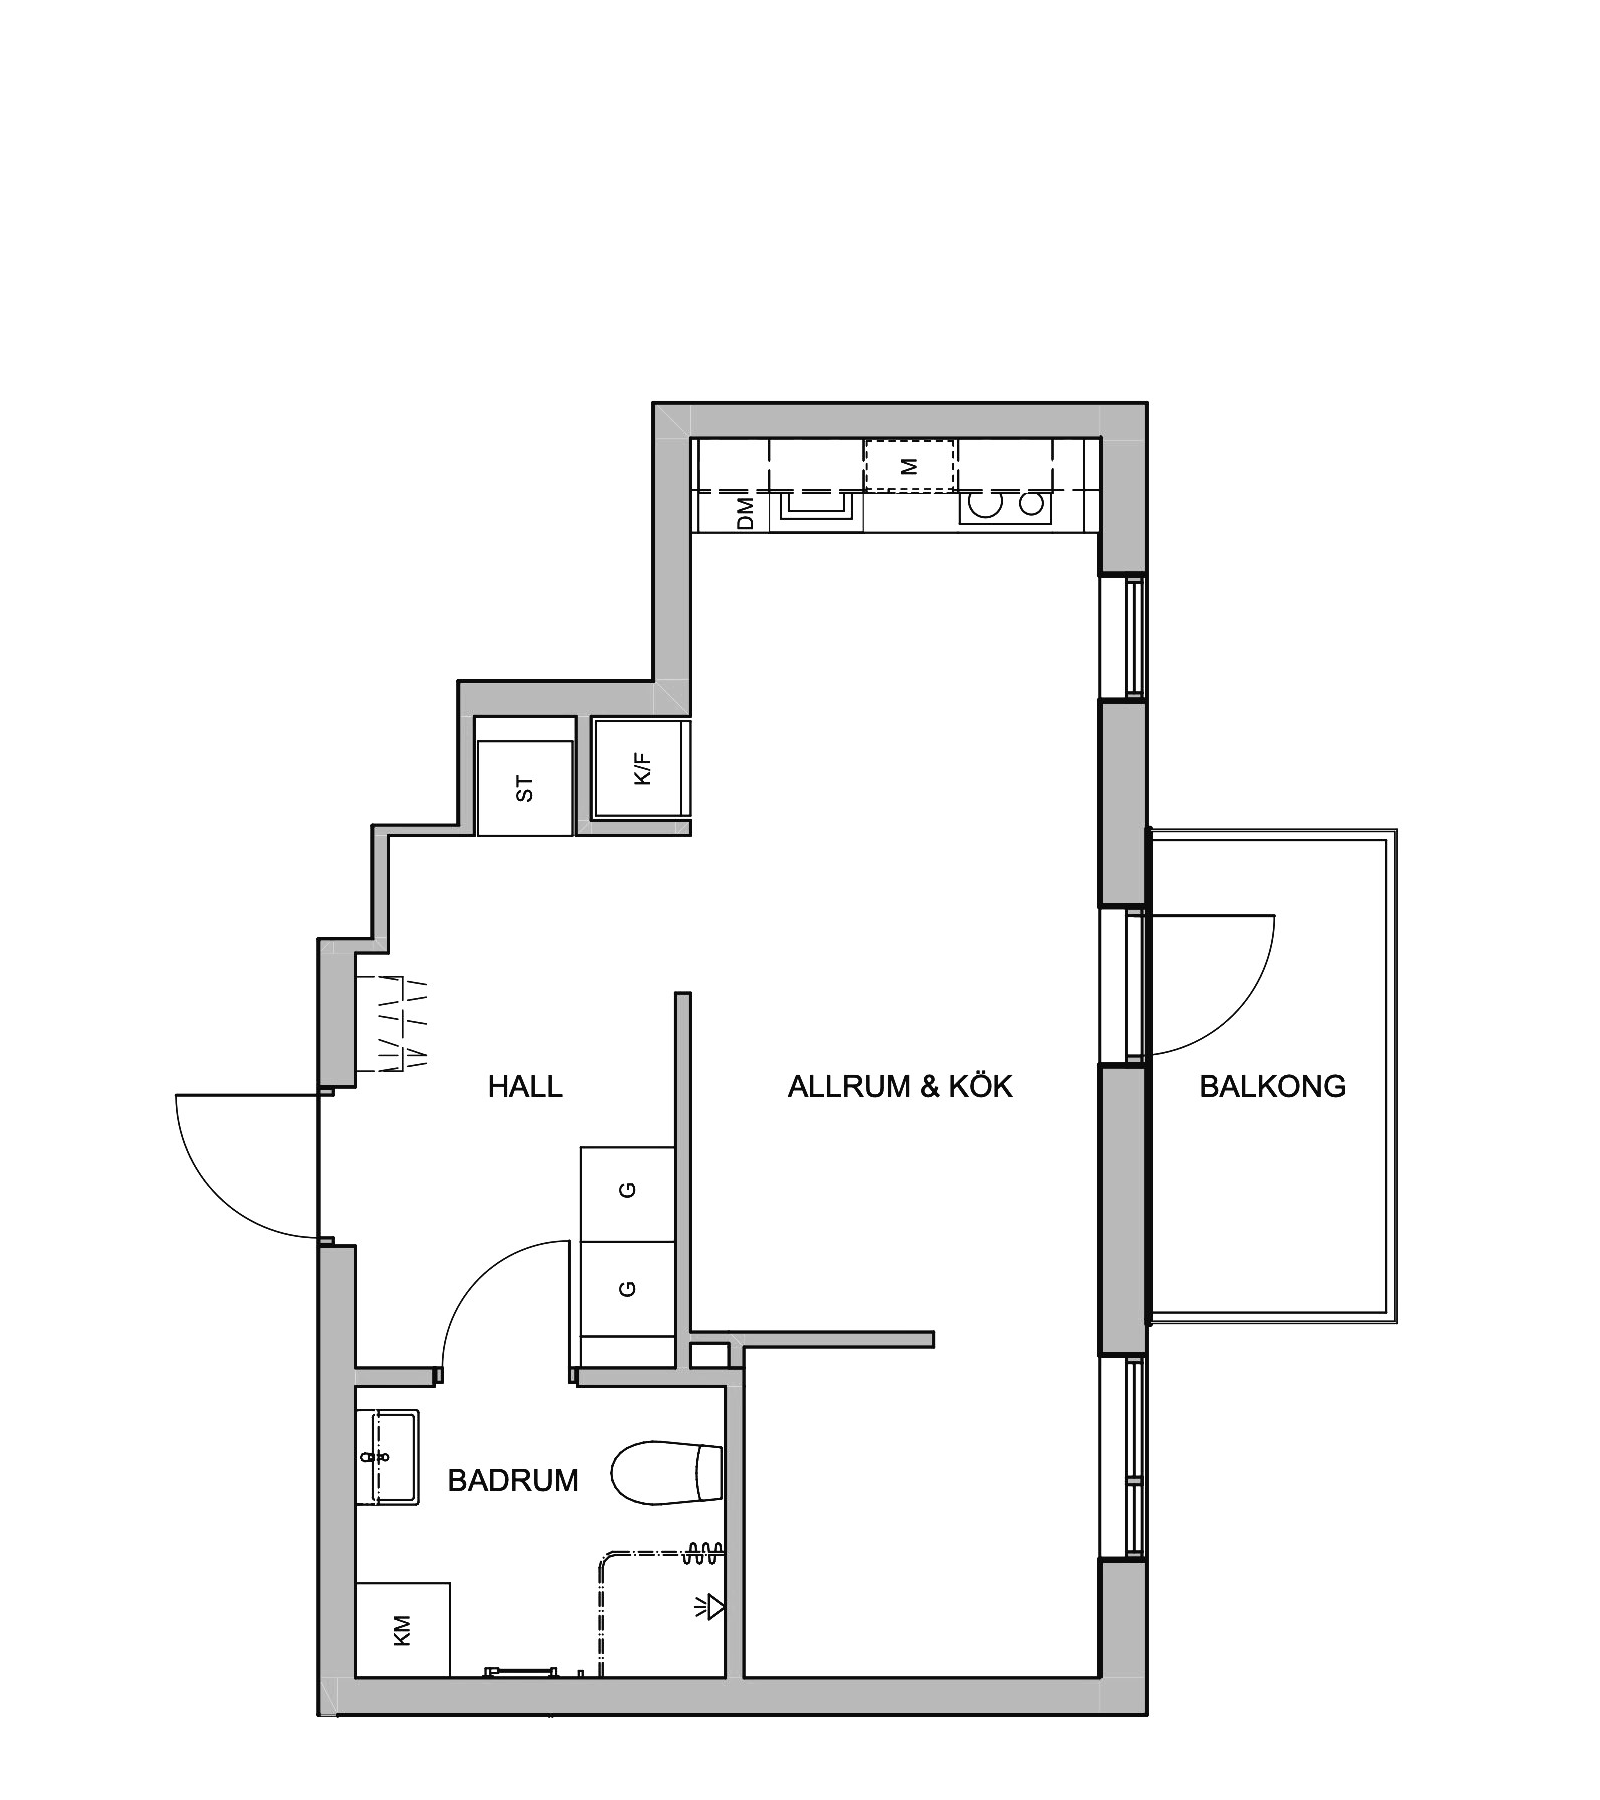

In [58]:
# Coordinates of the bounding rectangle
x, y, w, h = 190, 650, 1600, 1800

# Crop the image using the bounding rectangle coordinates
cropped_image = cv_image_2[y:y+h, x:x+w]

# Save or display the cropped image
cv2.imwrite('cropped_image.png', cropped_image)
# To display the image, uncomment the following lines:
cv2_imshow(cropped_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

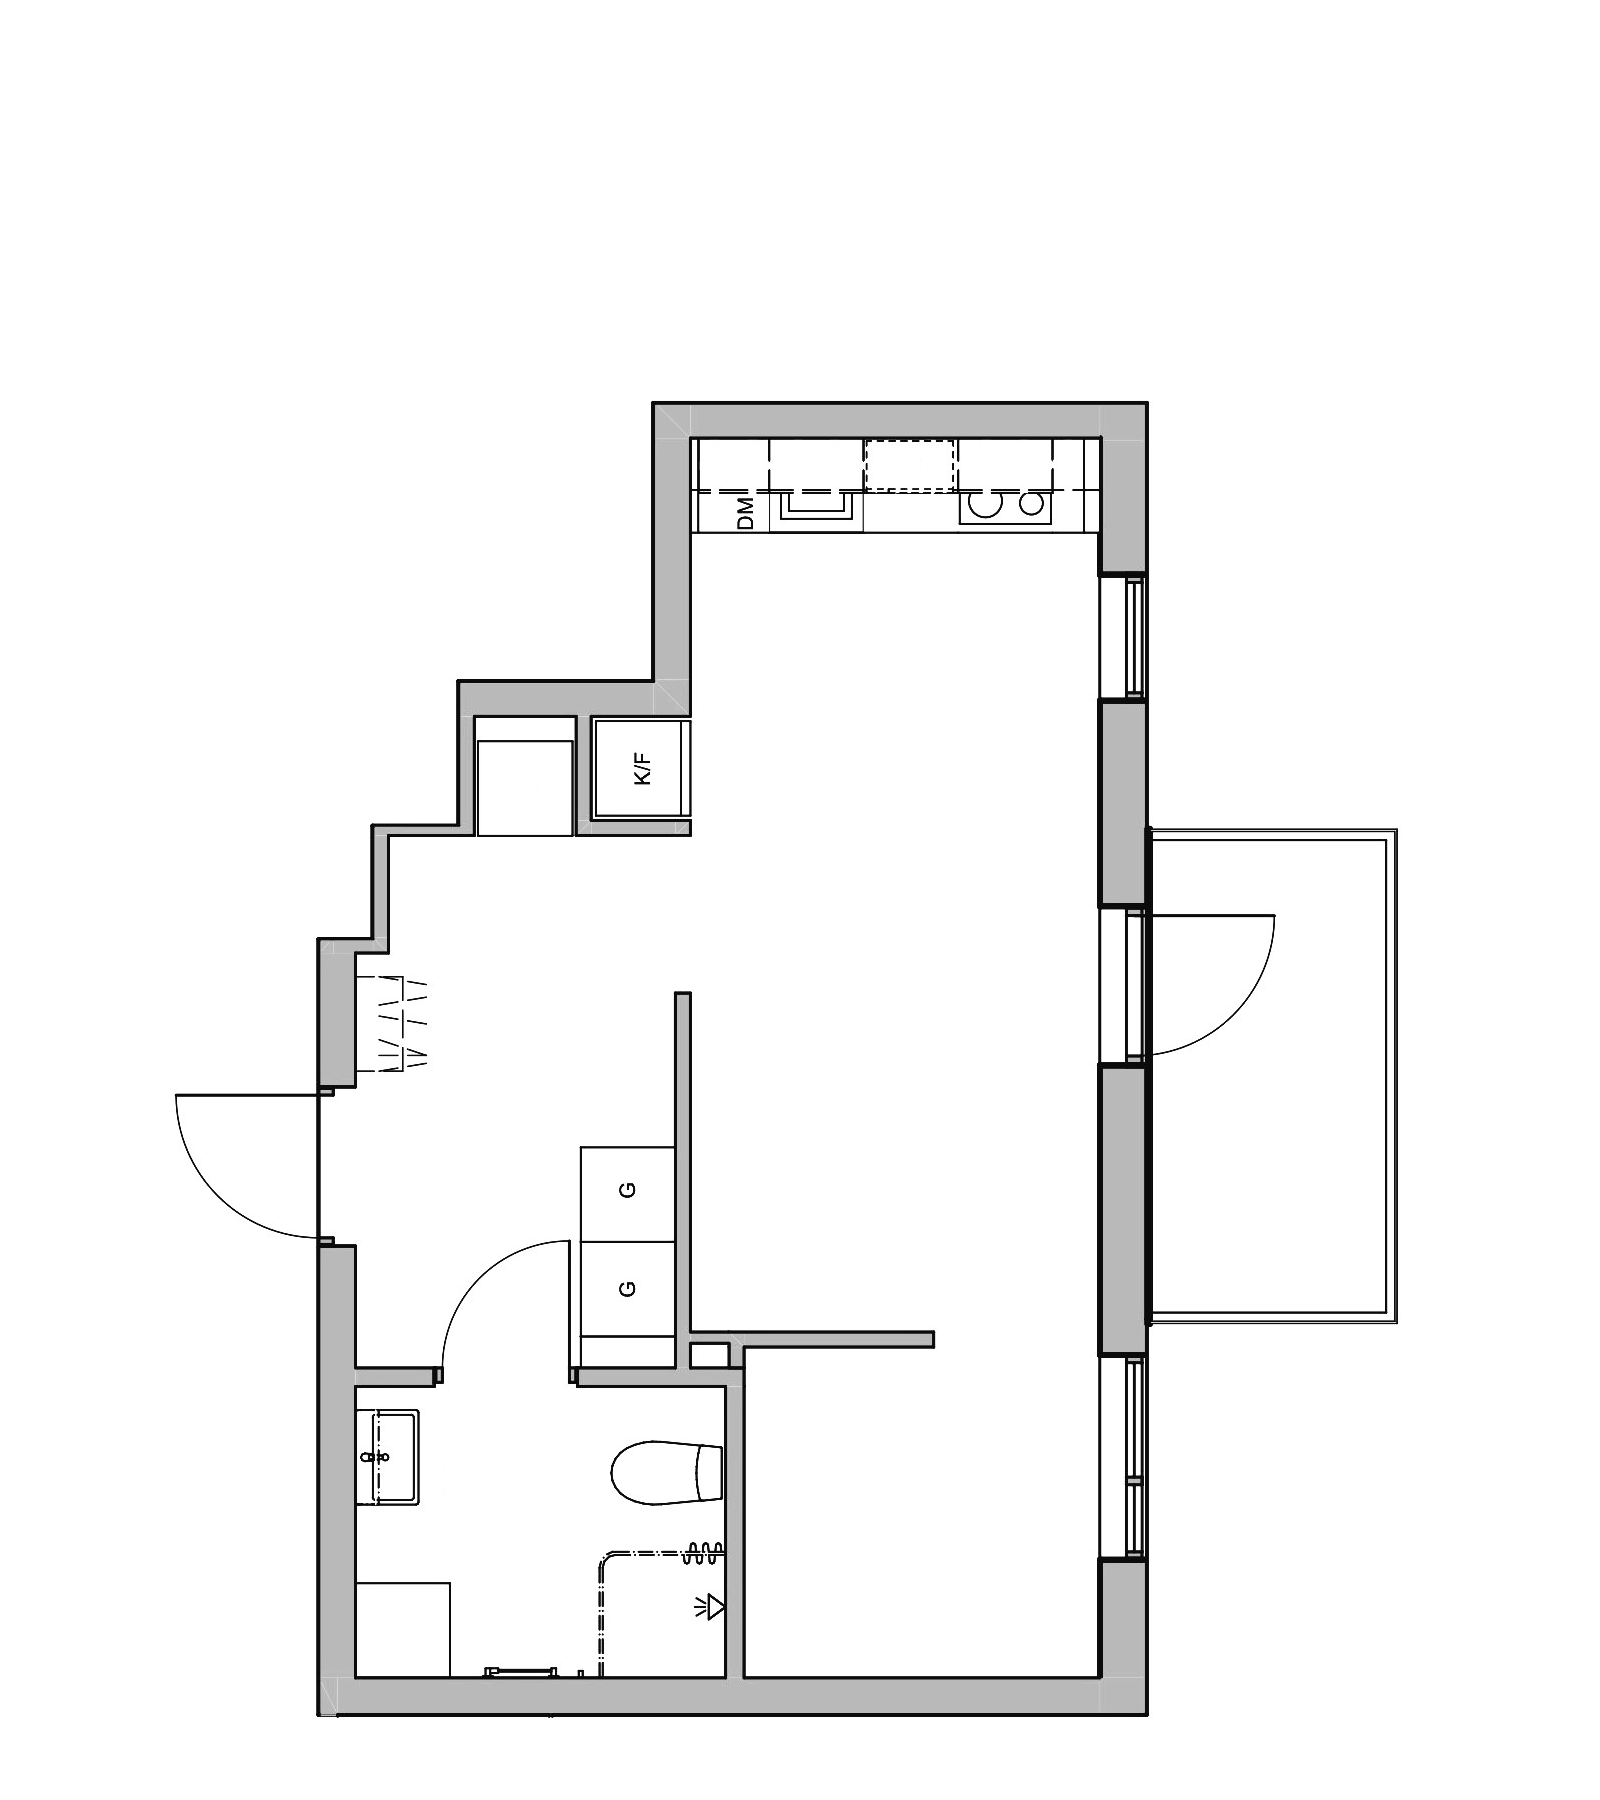

In [59]:
import easyocr

# Convert to grayscale
gray = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])  # Specify language (English in this case)

# Detect text with bounding boxes
results = reader.readtext(gray)

# Create a mask for text removal
mask = np.zeros_like(gray)

# Iterate over detected text and draw mask
for (bbox, text, prob) in results:
    if prob > 0.5:  # Confidence threshold
        (top_left, top_right, bottom_right, bottom_left) = bbox
        x_min = int(min(top_left[0], bottom_left[0]))
        y_min = int(min(top_left[1], top_right[1]))
        x_max = int(max(top_right[0], bottom_right[0]))
        y_max = int(max(bottom_left[1], bottom_right[1]))

        # Fill the detected text area in the mask
        cv2.rectangle(mask, (x_min, y_min), (x_max, y_max), 255, -1)

# Inpaint the image to remove text
text_removed_image = cv2.inpaint(cropped_image, mask, inpaintRadius=5, flags=cv2.INPAINT_TELEA)

# Save the output
cv2.imwrite("text_removed.png", text_removed_image)

# Display the result (optional)
cv2_imshow(text_removed_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


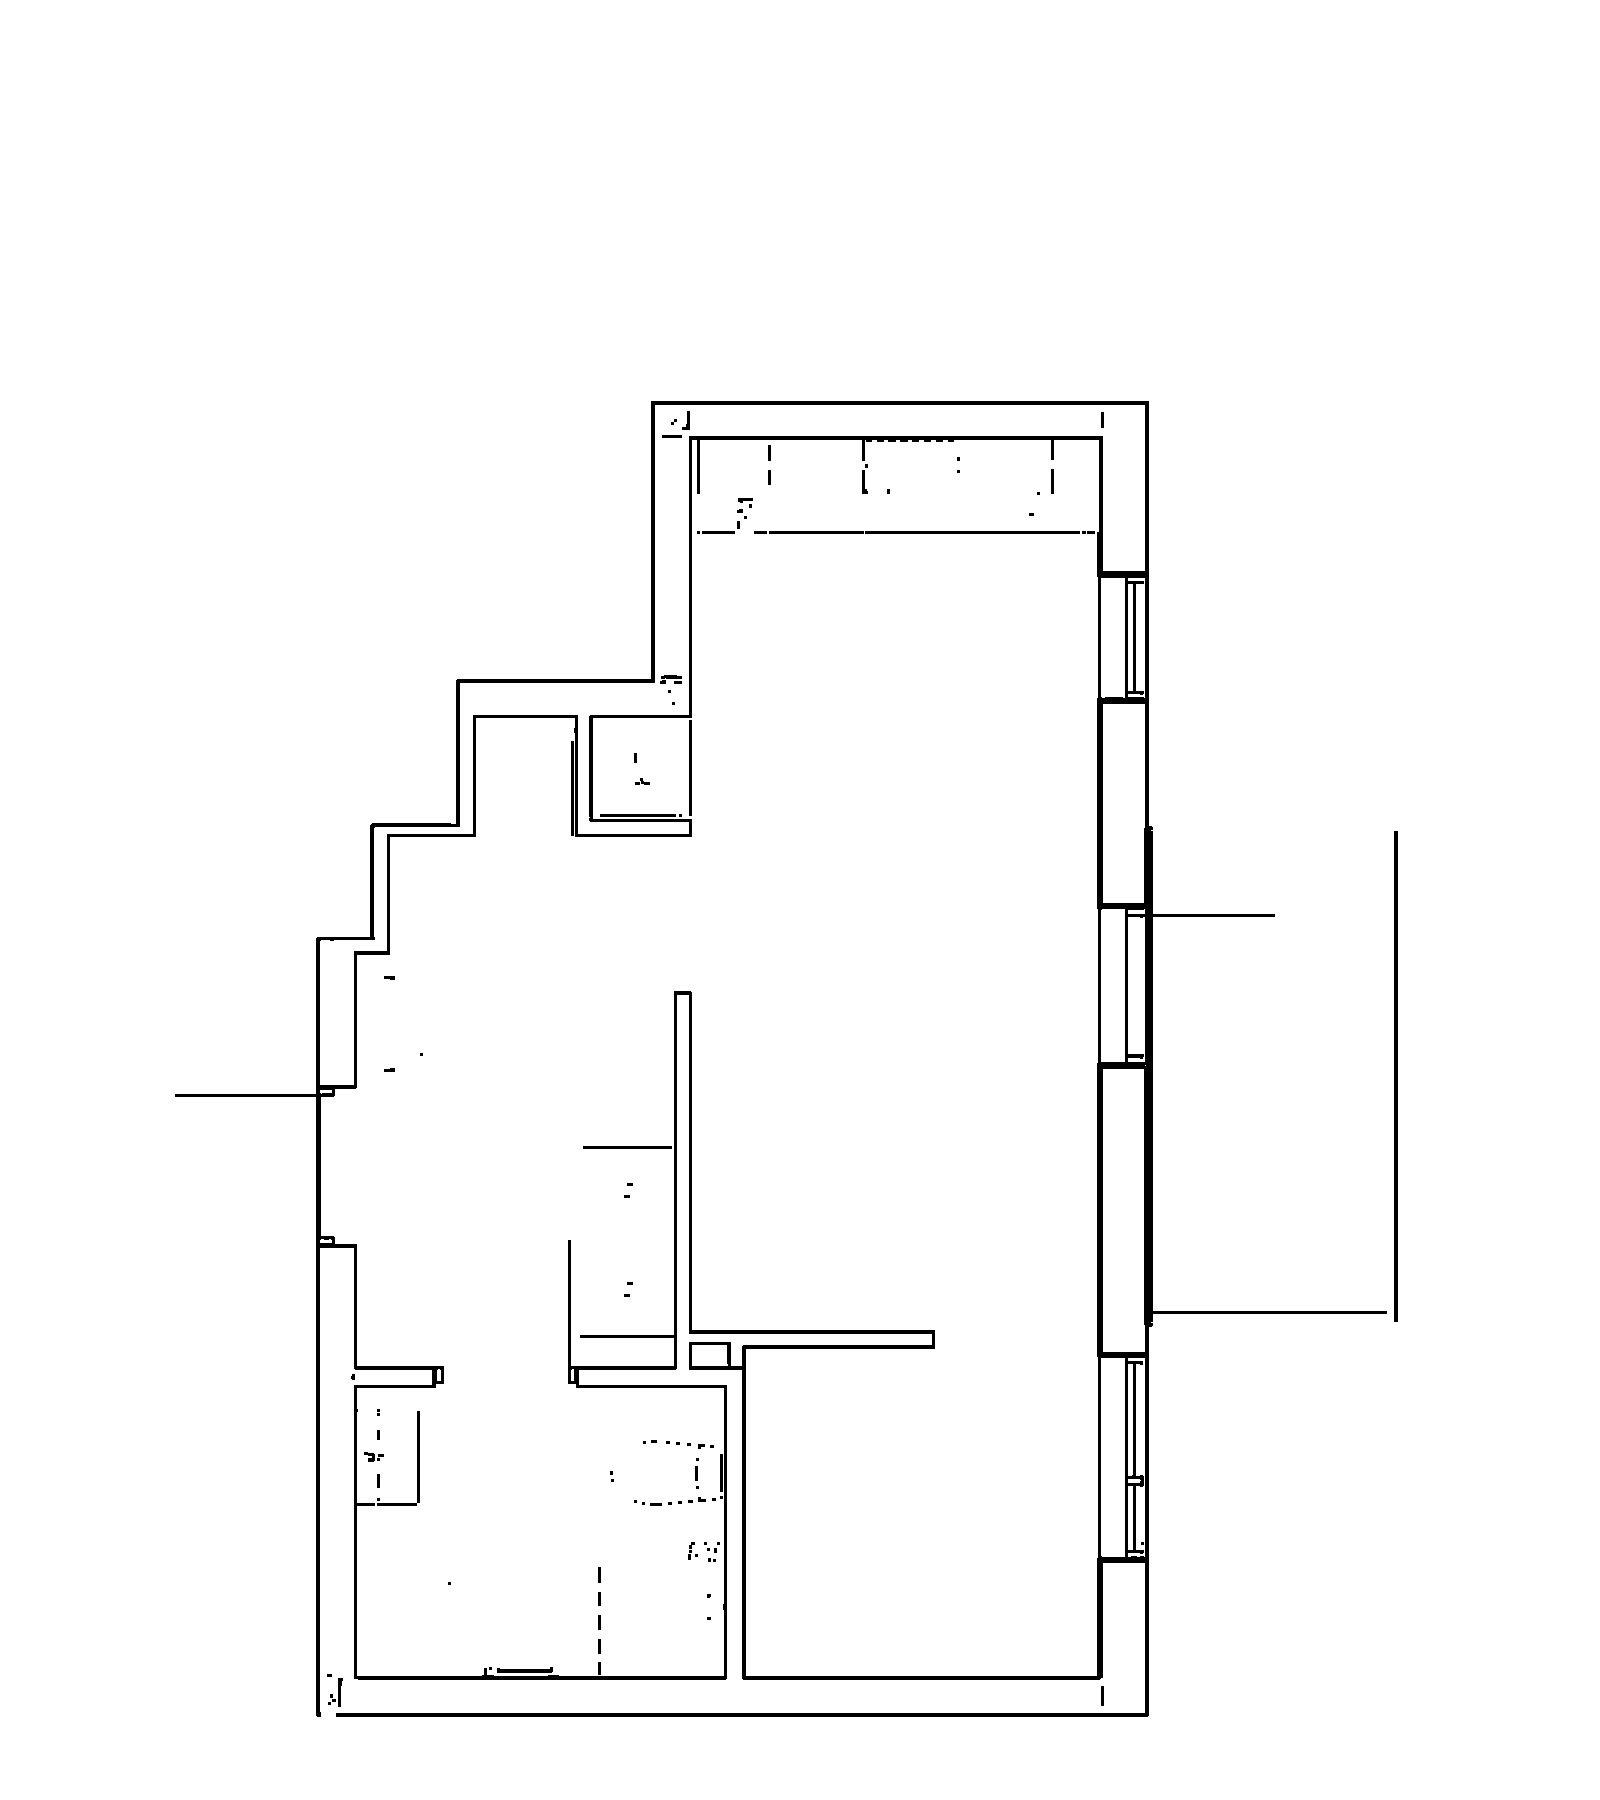

In [60]:
import cv2
import numpy as np

# Load the image
image_path = "/content/text_removed.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply adaptive thresholding to binarize the image
binary = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 2)

# Define a kernel to remove thin lines
kernel = np.ones((3, 3), np.uint8)  # Adjust kernel size for more or less removal

# Perform morphological opening to remove thin lines
processed = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=1)

# Invert back to original format
processed = cv2.bitwise_not(processed)

# Save and display
cv2.imwrite("thin_lines_removed.png", processed)
cv2_imshow(processed)
cv2.waitKey(0)
cv2.destroyAllWindows()


Saved filled image to: filled_image.png


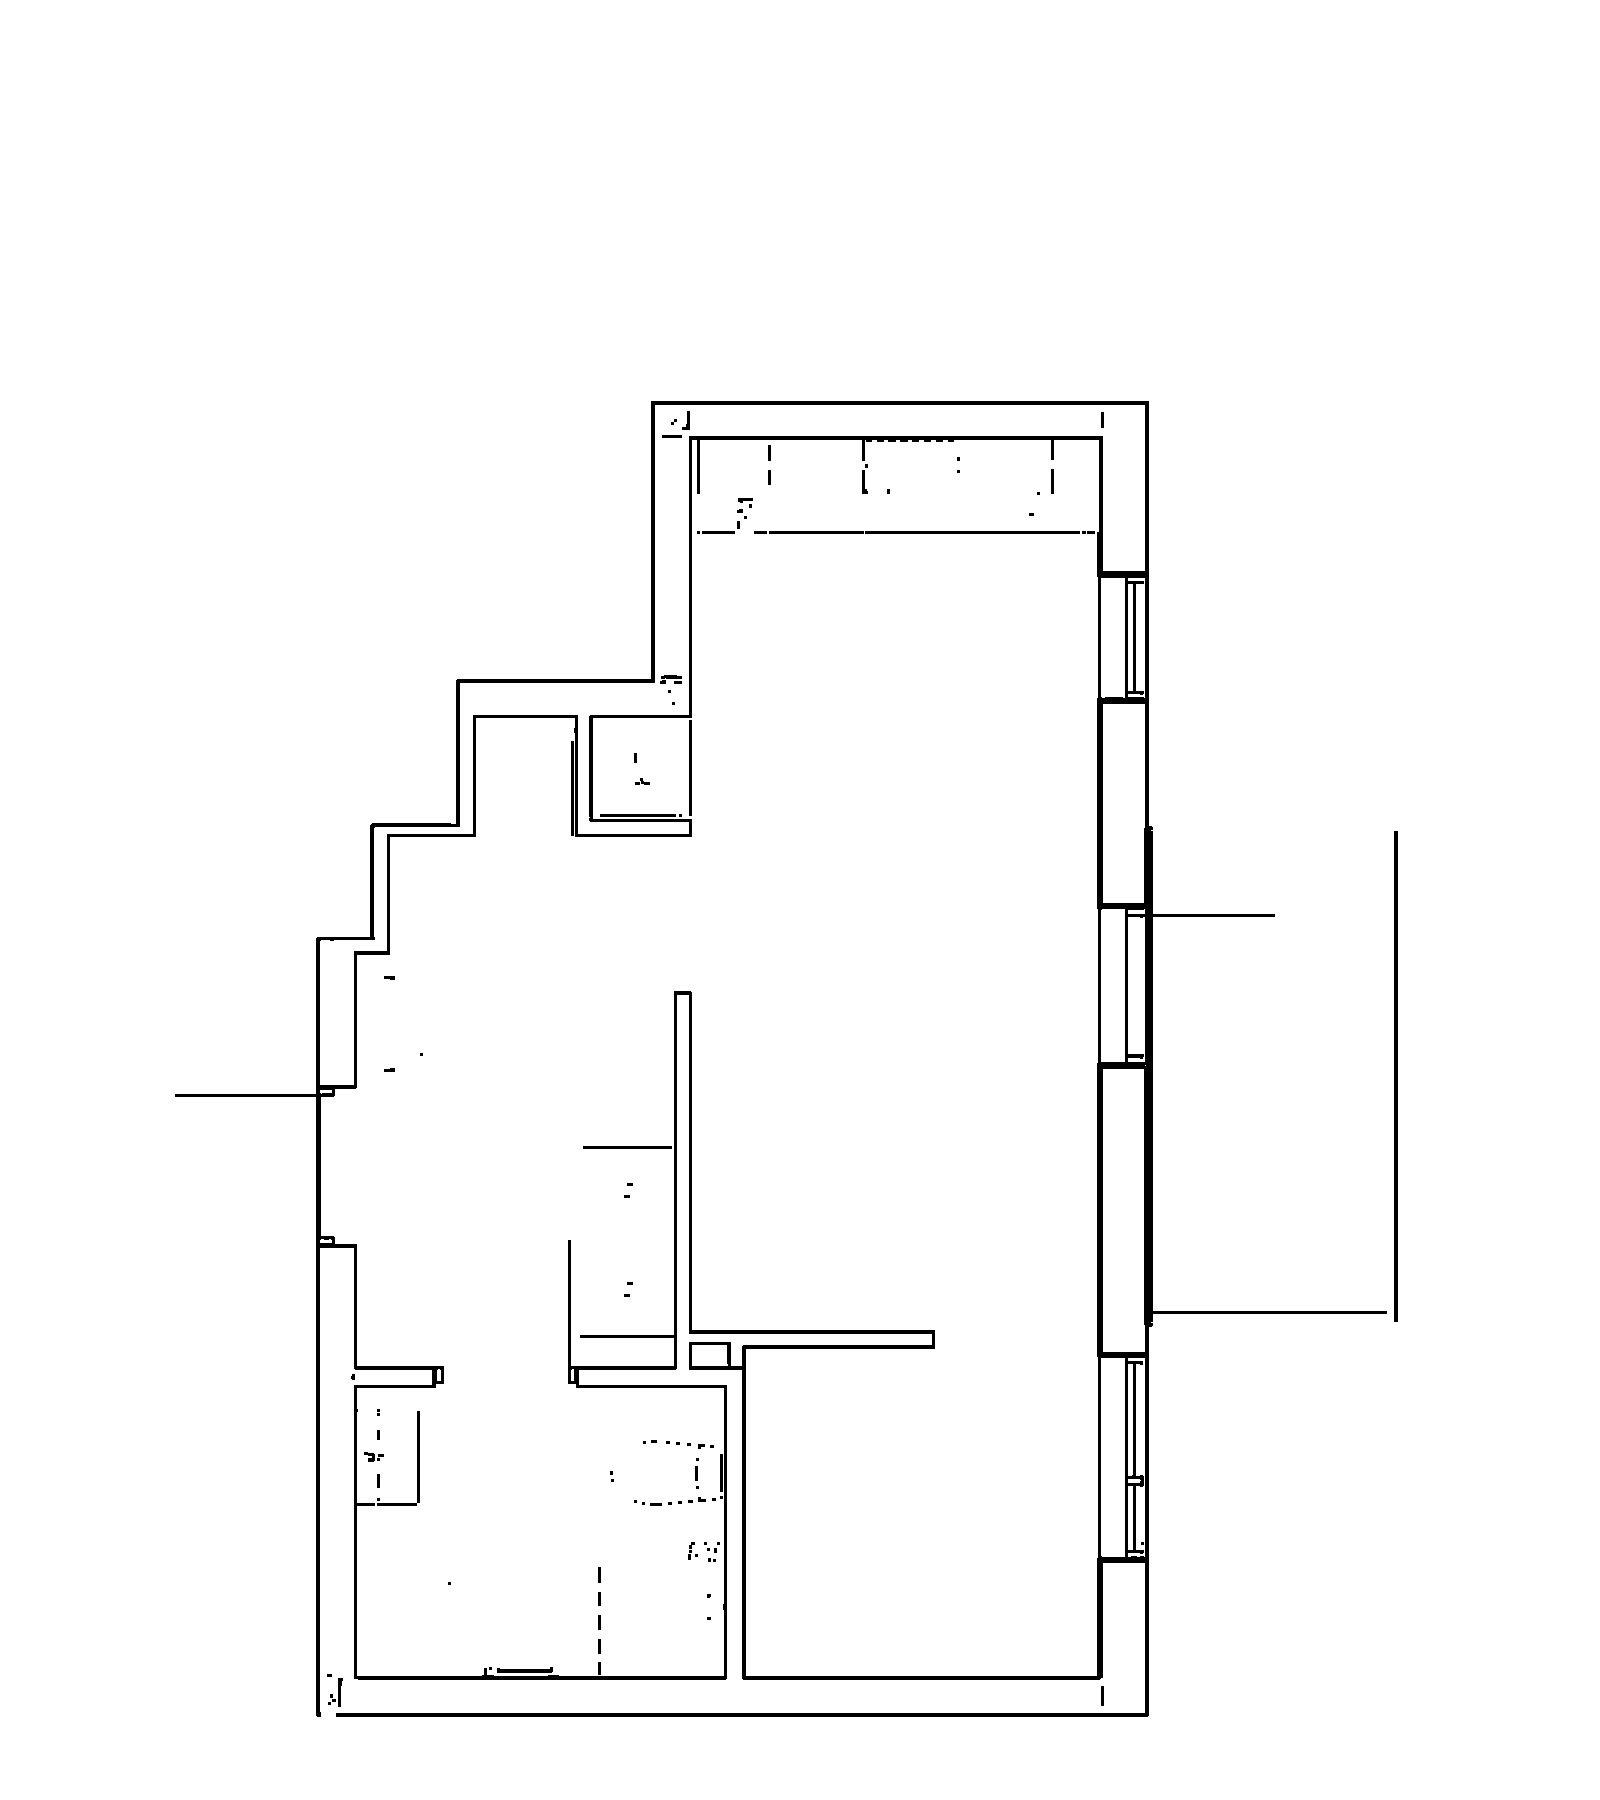

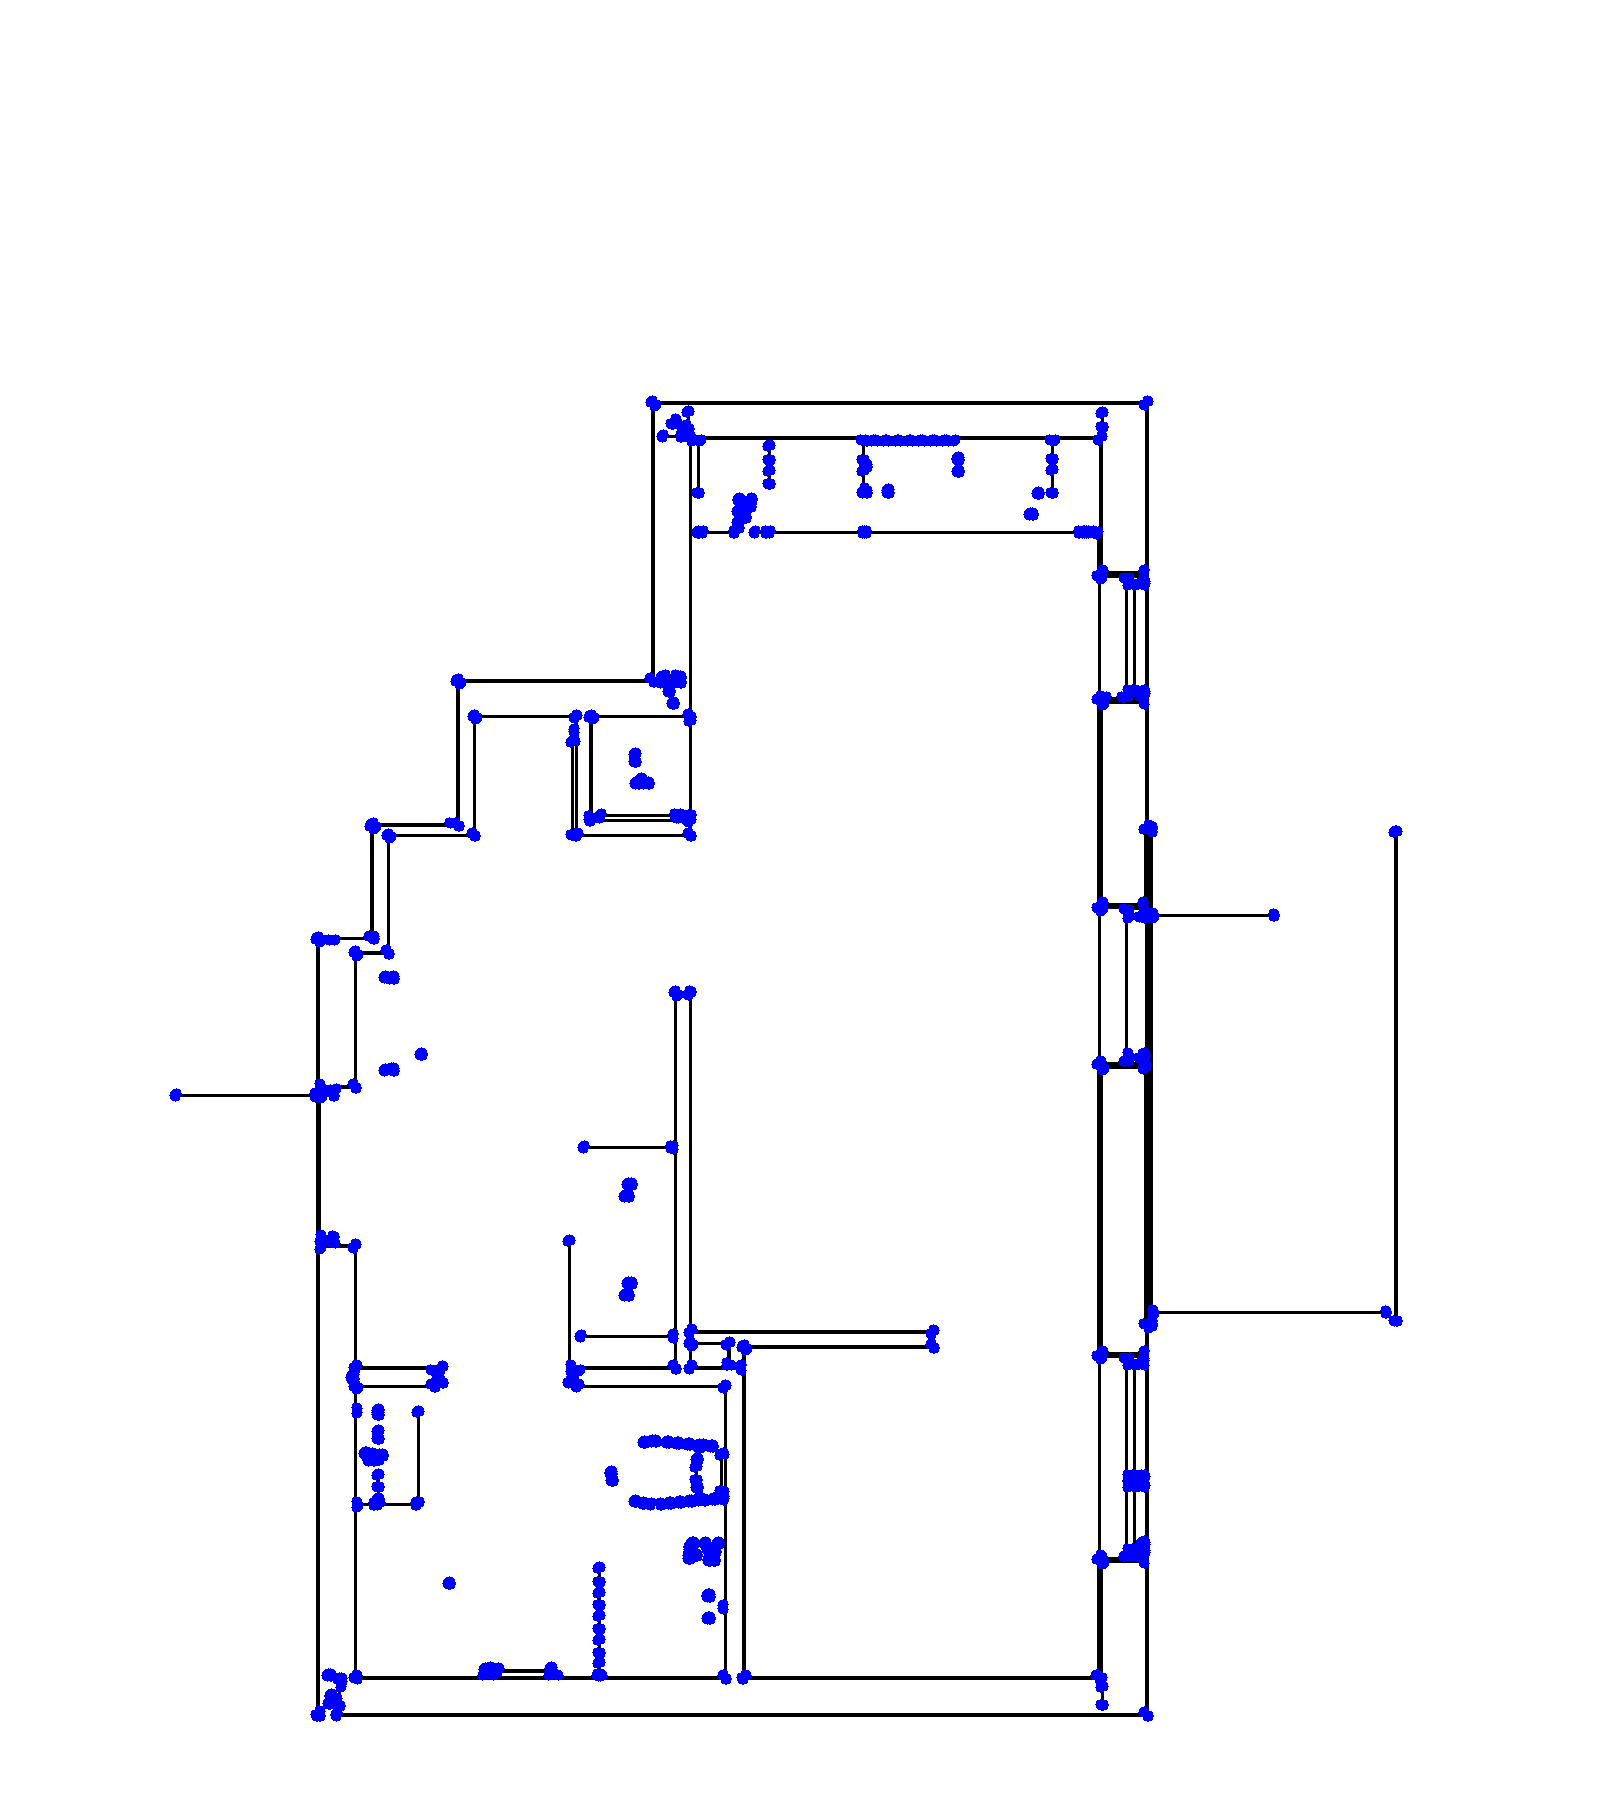

In [61]:
import cv2
import numpy as np

def fill_black_voids_floodfill(image_path, output_path="filled_image.png"):
    """
    Fills black voids (enclosed areas) in a binary image using flood fill.

    Args:
        image_path: Path to the input image.
        output_path: Path to save the filled image.
    """
    # Load in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Could not load image: {image_path}")

    # Invert the image so shapes are black and background is white
    inverted = 255 - image

    # Flood fill from the borders (e.g., top-left corner) to mark the true background
    h, w = inverted.shape
    mask = np.zeros((h+2, w+2), np.uint8)  # Flood fill mask must be 2 pixels larger than the image
    cv2.floodFill(inverted, mask, (0,0), 0)  # Fill with '0' (black) from top-left corner

    # Now, everything that isn't filled is considered a "hole"
    # So we fill holes with white (255)
    inverted[inverted != 0] = 255

    # Invert back to get white lines on black background
    filled_image = 255 - inverted

    # Save the result
    cv2.imwrite(output_path, filled_image)
    print(f"Saved filled image to: {output_path}")

    # Optional: Display
    from google.colab.patches import cv2_imshow
    cv2_imshow(filled_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def detect_edges_and_nodes(image_path, output_path="nodes_edges.png"):
    """
    Detects edges and nodes in a filled floor plan image.

    Args:
        image_path: Path to the filled image.
        output_path: Path to save the image with detected nodes and edges.
    """
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Edge detection
    edges = cv2.Canny(img, 50, 150, apertureSize=3)

    # Find contours (connected components) from edges
    contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # Get node coordinates from contour points
    nodes = []
    for contour in contours:
        for point in contour:
            nodes.append((point[0][0], point[0][1]))

    # Connect nodes to form edges (simplified logic for demonstration)
    edges = []
    for i in range(len(nodes)):
        for j in range(i + 1, len(nodes)):
            # Connect nodes if they are close enough (adjust threshold as needed)
            distance = np.sqrt((nodes[i][0] - nodes[j][0])**2 + (nodes[i][1] - nodes[j][1])**2)
            if distance < 20:  # Adjust threshold for connection distance
                edges.append((nodes[i], nodes[j]))

    # Visualization
    img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    for node in nodes:
        cv2.circle(img_color, node, 5, (255, 0, 0), -1)  # Blue nodes
    # You can add code here to draw edges on img_color if needed

    cv2.imwrite(output_path, img_color)
    from google.colab.patches import cv2_imshow
    cv2_imshow(img_color)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


# Usage Example
if __name__ == "__main__":
    filled_image_path = "filled_image.png"
    fill_black_voids_floodfill("thin_lines_removed.png", filled_image_path)
    detect_edges_and_nodes(filled_image_path)

Saved filled image to: filled_image_floodfill.png


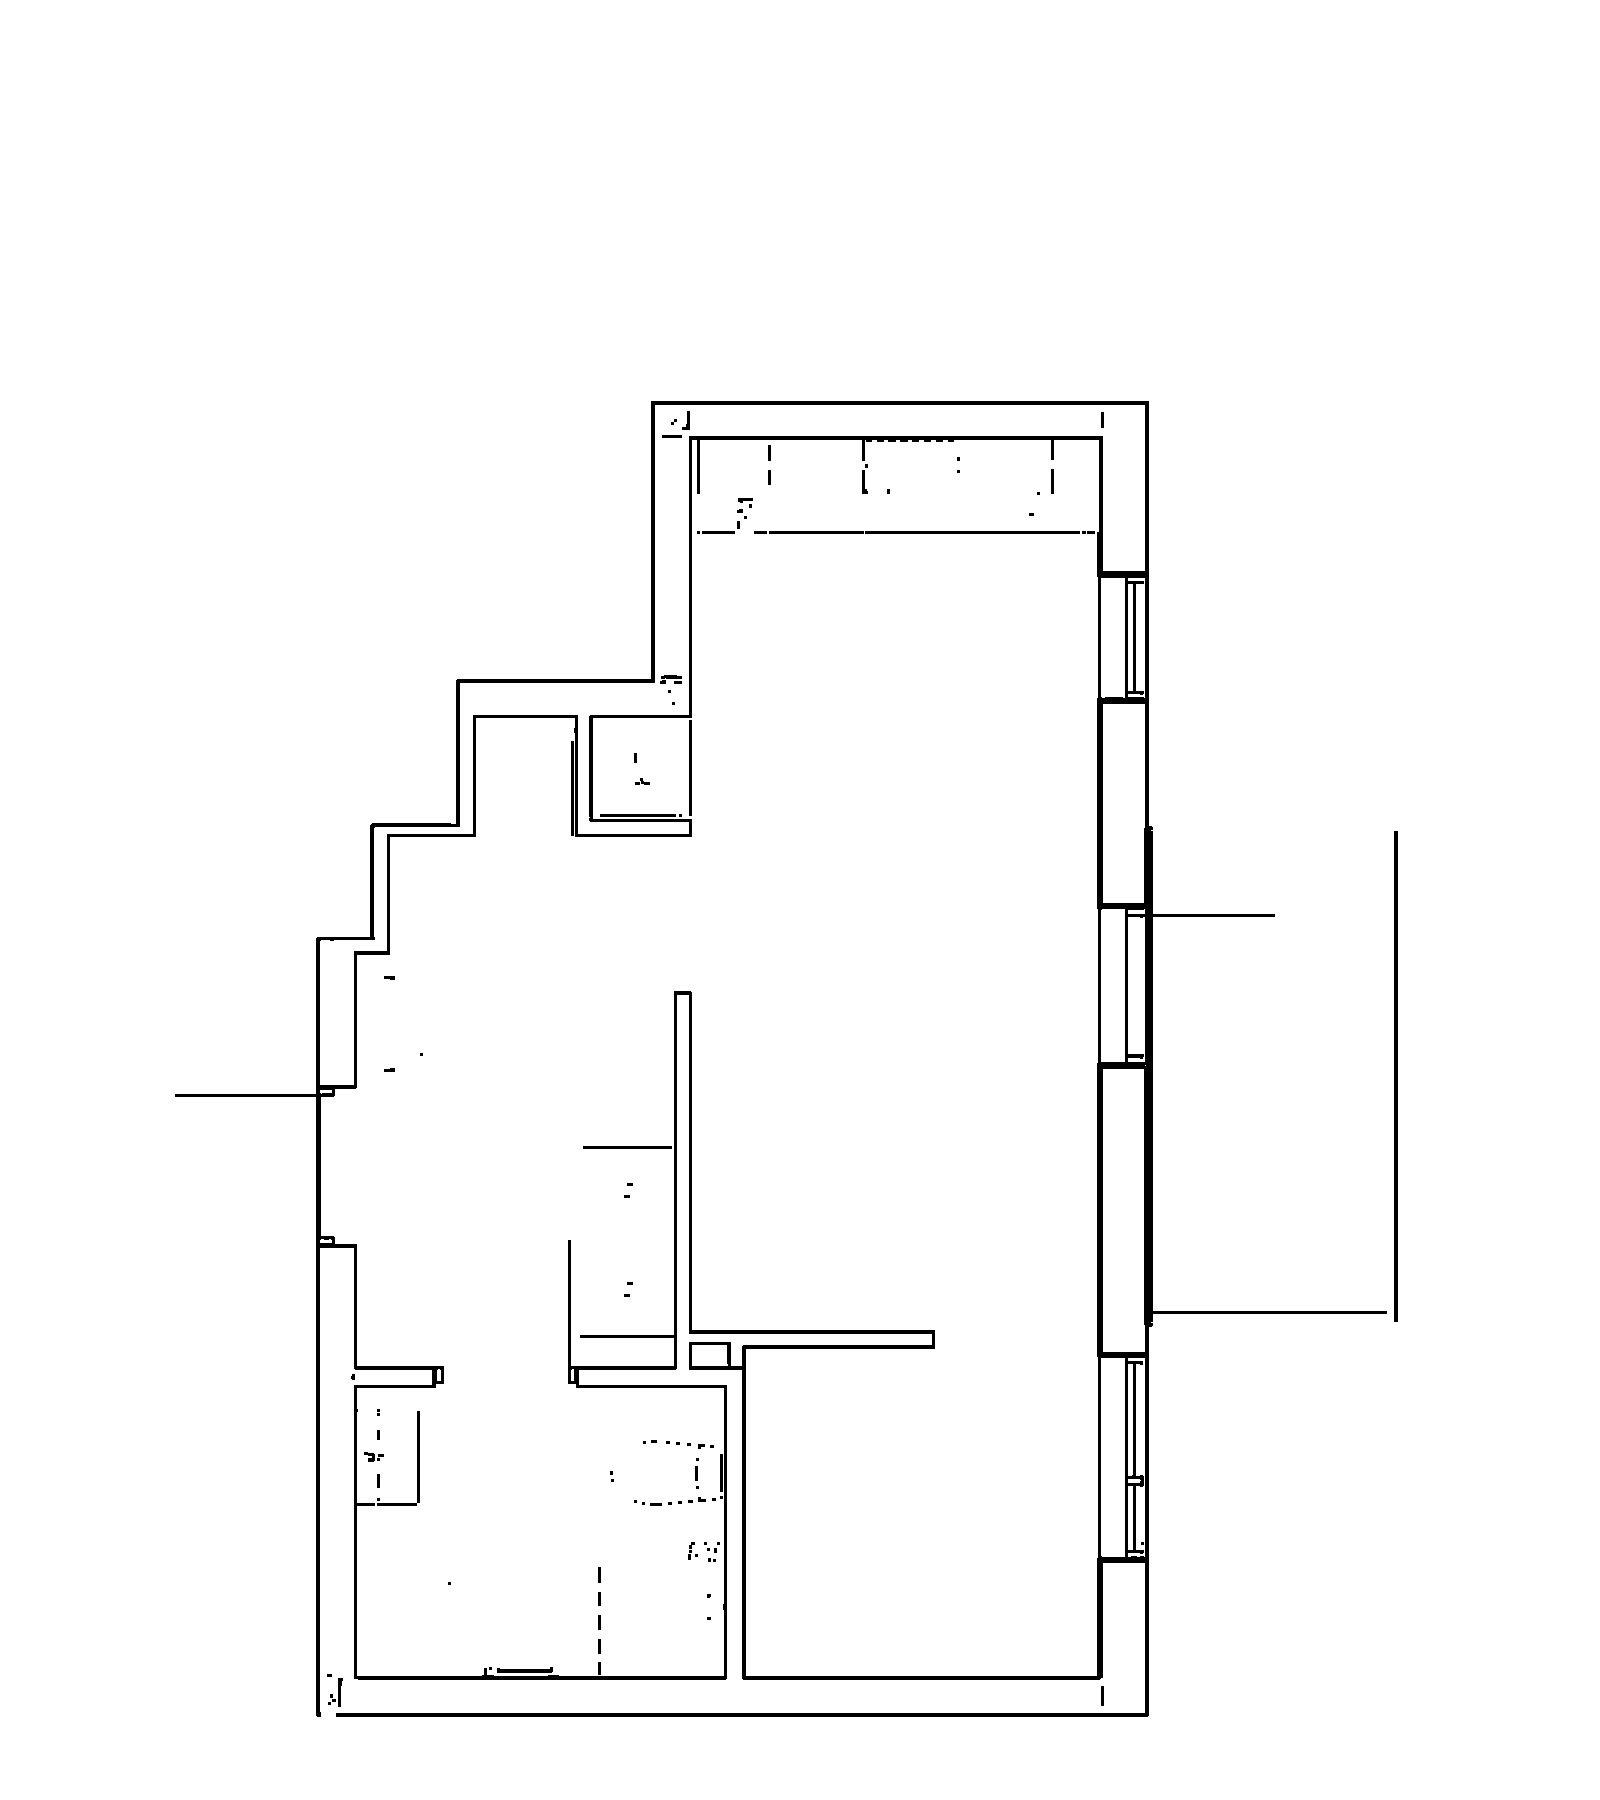

In [62]:
import cv2
import numpy as np

def fill_black_voids_floodfill(image_path, output_path="filled_image.png"):
    # Load in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Could not load image: {image_path}")

    # Invert the image so shapes are black and background is white
    inverted = 255 - image

    # Flood fill from the borders (e.g., top-left corner) to mark the true background
    h, w = inverted.shape
    mask = np.zeros((h+2, w+2), np.uint8)  # Flood fill mask must be 2 pixels larger than the image
    cv2.floodFill(inverted, mask, (0,0), 0)  # Fill with '0' (black) from top-left corner

    # Now, everything that isn't filled is considered a "hole"
    # So we fill holes with white (255)
    inverted[inverted != 0] = 255

    # Invert back to get white lines on black background
    filled_image = 255 - inverted

    # Save the result
    cv2.imwrite(output_path, filled_image)
    print(f"Saved filled image to: {output_path}")

    # Optional: Display
    cv2_imshow(filled_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Usage Example
if __name__ == "__main__":
    fill_black_voids_floodfill("/content/thin_lines_removed.png", "filled_image_floodfill.png")


In [40]:
import cv2
import numpy as np
import svgwrite

def detect_edges_and_nodes(image_path,
                           canny_lower=50,
                           canny_upper=150,
                           epsilon_ratio=0.01,
                           svg_output="nodes_output.svg",
                           output_image="edges_and_nodes.png"):
    """
    1. Detect edges in a grayscale image using Canny.
    2. Find contours and approximate them to polygons (nodes).
    3. Print node coordinates to console.
    4. Draw edges and nodes on the image and save as a PNG.
    5. Save the polygons (nodes) to an SVG file.

    Args:
        image_path (str): Path to the input image.
        canny_lower (int): Lower threshold for Canny edge detection.
        canny_upper (int): Upper threshold for Canny edge detection.
        epsilon_ratio (float): Ratio of the arc length for polygon approximation.
        svg_output (str): Filename for the SVG output.
        output_image (str): Filename for the annotated output image.
    """
    # --- Read the Image in Grayscale ---
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Could not load image: {image_path}")

    # --- Canny Edge Detection ---
    edges = cv2.Canny(image, canny_lower, canny_upper)

    # --- Find Contours in the Edge Map ---
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # --- Approximate Contours to Polygons (Nodes) ---
    polygons = []
    for contour in contours:
        perimeter = cv2.arcLength(contour, True)
        epsilon = epsilon_ratio * perimeter
        approx_polygon = cv2.approxPolyDP(contour, epsilon, True)
        polygons.append(approx_polygon)

    # --- Print the Node Coordinates ---
    for i, poly in enumerate(polygons):
        print(f"Polygon {i}:")
        for j, pt in enumerate(poly):
            x, y = pt[0]
            print(f"  Node {j}: (x={x}, y={y})")

    # --- Draw the Contours and Nodes on a Copy of the Original Image ---
    color_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    for poly in polygons:
        # Draw the polygon
        cv2.polylines(color_image, [poly], True, (0, 255, 0), 2)
        # Draw the nodes
        for pt in poly:
            x, y = pt[0]
            cv2.circle(color_image, (x, y), 5, (0, 0, 255), -1)

    # --- Save the Annotated Image ---
    cv2.imwrite(output_image, color_image)
    print(f"Annotated image with edges and nodes saved to: {output_image}")

    # --- Save the Nodes as an SVG ---
    dwg = svgwrite.Drawing(svg_output, profile='tiny')
    for poly in polygons:
        # Convert each point to a (float, float) tuple
        points = [(float(pt[0][0]), float(pt[0][1])) for pt in poly]
        dwg.add(dwg.polygon(points=points, fill='none', stroke='black'))
    dwg.save()
    print(f"SVG vector output saved to: {svg_output}")

# --- Usage Example ---
if __name__ == "__main__":
    # Provide your own image path here
    input_image_path = "/content/refined_output.png"
    detect_edges_and_nodes(
        image_path=input_image_path,
        canny_lower=50,
        canny_upper=150,
        epsilon_ratio=0.01,
        svg_output="nodes_output.svg",
        output_image="edges_and_nodes.png"
    )


Polygon 0:
  Node 0: (x=1048, y=1783)
  Node 1: (x=1037, y=1785)
  Node 2: (x=1035, y=1947)
  Node 3: (x=955, y=1947)
  Node 4: (x=914, y=1877)
  Node 5: (x=861, y=1905)
  Node 6: (x=908, y=1990)
  Node 7: (x=1139, y=1990)
  Node 8: (x=1138, y=1947)
  Node 9: (x=1049, y=1945)
Polygon 1:
  Node 0: (x=785, y=1662)
  Node 1: (x=739, y=1694)
  Node 2: (x=807, y=1802)
  Node 3: (x=852, y=1771)
Polygon 2:
  Node 0: (x=1050, y=1592)
  Node 1: (x=1040, y=1667)
  Node 2: (x=1052, y=1590)
  Node 3: (x=1442, y=1590)
  Node 4: (x=1444, y=1946)
  Node 5: (x=1349, y=1978)
  Node 6: (x=1444, y=1947)
  Node 7: (x=1442, y=1590)
Polygon 3:
  Node 0: (x=612, y=1367)
  Node 1: (x=566, y=1398)
  Node 2: (x=635, y=1506)
  Node 3: (x=680, y=1476)
Polygon 4:
  Node 0: (x=1039, y=1309)
  Node 1: (x=1039, y=1677)
  Node 2: (x=1039, y=1309)
  Node 3: (x=1470, y=1298)
  Node 4: (x=1062, y=1337)
  Node 5: (x=1064, y=1557)
  Node 6: (x=1469, y=1558)
  Node 7: (x=1469, y=1986)
  Node 8: (x=1355, y=1978)
  Node 9: (x

In [64]:
import cv2
import numpy as np

def remap_floorplan_colors(input_path, output_path):
    """
    Reads a grayscale floorplan image and remaps colors so that:
      - White areas become black
      - Gray background becomes white
      - Black lines remain black
    The final result is a strictly black-and-white image.
    """
    # Read the image in grayscale
    img = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f"Could not load image: {input_path}")

    # Create an output image of the same size
    remapped = np.zeros_like(img)

    # Define thresholds
    # Adjust these as needed based on your image’s intensities
    # Anything below black_thresh is considered black
    # Anything above white_thresh is considered white => turned black
    # Everything in between is turned white
    black_thresh = 200
    white_thresh = 300

    # Map black lines (pixel < black_thresh) to black
    # Map white areas (pixel > white_thresh) to black
    # Map gray background (between thresholds) to white
    remapped[(img < black_thresh) | (img > white_thresh)] = 0      # black
    remapped[(img >= black_thresh) & (img <= white_thresh)] = 255  # white

    # Save the result
    cv2.imwrite(output_path, remapped)
    print(f"Remapped image saved to: {output_path}")

# --- Usage Example ---
if __name__ == "__main__":
    input_image = "/content/cropped_image.png"     # Replace with your floorplan image
    output_image = "/content/just_walls.png"
    remap_floorplan_colors(input_image, output_image)


Remapped image saved to: /content/just_walls.png


In [47]:
import cv2
import numpy as np
import svgwrite

def close_holes_and_detect_nodes(image_path, svg_output="output.svg", cleaned_image_path="cleaned_image.png"):
    """
    1. Closes holes using morphological closing.
    2. Expands boundaries using dilation.
    3. Detects edges using Canny.
    4. Finds contours and approximates them to polygons.
    5. Saves nodes as vectors in an SVG file.
    6. Overlays the detected nodes visualization onto an inverted version of the cleaned image.
    """
    # --- Read Image ---
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Could not load image: {image_path}")

    # --- Thresholding (to get a binary mask) ---
    _, binary = cv2.threshold(image, 20, 255, cv2.THRESH_BINARY_INV)

    # --- Morphological Closing to Fill Holes ---
    kernel = np.ones((5, 5), np.uint8)
    closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=5)

    # --- Dilation to Expand the Boundaries of the Wall ---
    dilated = cv2.dilate(closed, kernel, iterations=2)

    # --- Edge Detection with Canny ---
    edges = cv2.Canny(dilated, 50, 500)

    # --- Find Contours ---
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # --- Approximate Each Contour to a Polygon ---
    approximations = []
    for contour in contours:
        epsilon = 0.01 * cv2.arcLength(contour, True)
        approx_polygon = cv2.approxPolyDP(contour, epsilon, True)
        approximations.append(approx_polygon)

    # --- Create an SVG and Draw the Polygons ---
    dwg = svgwrite.Drawing(svg_output, profile='tiny')
    for polygon in approximations:
        points = [(float(pt[0][0]), float(pt[0][1])) for pt in polygon]
        dwg.add(dwg.polygon(points, fill='none', stroke='black'))
    dwg.save()

    # --- Draw Results on an Image for Visualization ---
    # Create a color version of the original image
    color_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    for polygon in approximations:
        cv2.polylines(color_image, [polygon], True, (0, 255, 0), 2)
        for pt in polygon:
            x, y = pt[0]
            cv2.circle(color_image, (x, y), 5, (0, 0, 255), -1)

    # --- Read and Invert the Cleaned Image ---
    cleaned = cv2.imread(cleaned_image_path, cv2.IMREAD_GRAYSCALE)
    if cleaned is None:
        raise FileNotFoundError(f"Could not load cleaned image: {cleaned_image_path}")
    inverted_cleaned = cv2.bitwise_not(cleaned)
    # Convert the inverted cleaned image to BGR (to match color_image)
    inverted_cleaned_color = cv2.cvtColor(inverted_cleaned, cv2.COLOR_GRAY2BGR)

    # --- Overlay the Two Images ---
    # Ensure both images are the same size
    if inverted_cleaned_color.shape != color_image.shape:
        inverted_cleaned_color = cv2.resize(inverted_cleaned_color, (color_image.shape[1], color_image.shape[0]))
    # Blend the images (adjust alpha and beta to control blending)
    combined = cv2.addWeighted(inverted_cleaned_color, 0.5, color_image, 0.5, 0)

    # Save the combined image
    cv2.imwrite("combined_output.png", combined)
    print(f"SVG vector output saved to: {svg_output}")
    print("Combined visualization saved to: combined_output.png")

# --- Usage Example ---
if __name__ == "__main__":
    image_path = "/content/refined_output.png"  # Replace with your input image path
    cleaned_image_path = "/content/refined_output.png"  # Replace with your cleaned image path
    close_holes_and_detect_nodes(image_path, svg_output="nodes_output.svg", cleaned_image_path=cleaned_image_path)


SVG vector output saved to: nodes_output.svg
Combined visualization saved to: combined_output.png


Detected 10 enclosed spaces
Space 1:
Space 2:
Space 3:
Space 4:
Space 5:
Space 6:
Space 7:
Space 8:
Space 9:
Space 10:


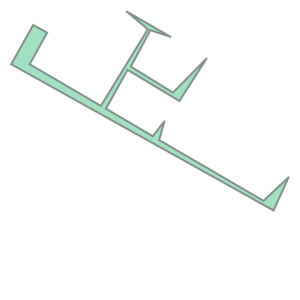

In [45]:
# prompt: now use shapely to detect spaces inside

from shapely.geometry import Polygon, Point

def detect_spaces(image_path):
    """
    Detects enclosed spaces within a binary image using Shapely.
    """
    import cv2
    import numpy as np
    from shapely.geometry import Polygon, Point

    # Load the binary image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f"Could not load image: {image_path}")

    # Find contours
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    spaces = []
    for contour in contours:
      # Approximate the contour to a polygon
      epsilon = 0.01 * cv2.arcLength(contour, True)  # Adjust epsilon for approximation accuracy
      approx = cv2.approxPolyDP(contour, epsilon, True)

      # Convert the approximated contour points to a Shapely Polygon
      polygon_points = [(point[0][0], point[0][1]) for point in approx]
      polygon = Polygon(polygon_points)

      # Check if the polygon is valid and has an area greater than zero
      if polygon.is_valid and polygon.area > 0:
          spaces.append(polygon)


    return spaces

# Example usage:
if __name__ == "__main__":
    image_path = "/content/refined_output.png"  # Replace with your image path
    spaces = detect_spaces(image_path)
    print(f"Detected {len(spaces)} enclosed spaces")

    # Further processing or visualization of the detected spaces.

    # For example, you can print the coordinates of the spaces:
    for i, space in enumerate(spaces):
        print(f"Space {i+1}:")
space


